# Programming Lab 2 - Machine Learning Experiment

***
##### CS 434 - Data Mining and Machine Learning
##### Oregon State University-Cascades
***

In [2]:
name = "Austin Martin"   # <== fill in
assert name != ""
print(name+'\'s Lab 2 submission')

Austin Martin's Lab 2 submission


# Instructions

## Section Code
* Complete the sections below. 

* Make sure to use the current date column as the predictor (`-1`).

* Where appropriate, make sure your code is within the function for the task.

* You may add helper functions (if needed)

* Comment your work: either within the code or as text blocks above.

## Lab Report
* Answer the questions with a thoughtful **paragraph**. You may include graphs, tables, and/or code blocks with `print` as you need.

* Your responses should convey your understanding of the process, your results, and your analysis of those results.

* Answers not placed in the correct section of the Report will not be graded.

* Half-assed answers will receive half a grade.

* Replace the *Lorem ipsum* text with your answers with the Response section.

* *Take pride in visual appeal of your answers.* Format your responses nicely. Review the markup tutorial in `Lecture 00-Getting Started`.


***
# Load packages 
***

Any additional packages you need for this lab should be added here.

**DO NOT** import packages anywhere else!

In [3]:
import enum 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

C:\Users\Fordr\AppData\Local\Temp\ipykernel_22920\3467885056.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr
C:\Users\Fordr\AppData\Local\Temp\ipykernel_22920\3467885056.py:6: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr


***
# Dataset
***

In this Lab, you will build a linear regressive model to predict the number of `Covid19` cases and deaths by country.

In [4]:
cases_data_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'

deaths_data_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv'

> These datasets update continuously and should contain data up to present.

### Some lists of countries
These will be helpful for filtering interesting subsets of the data.

In [5]:
north_america = ['US', 'Canada', 'Mexico']
south_america = ['Brazil', 'Argentina', 'Chile', 'Venezuela']             
europe = ['Spain', 'France', 'Germany', 'United Kingdom']
africa = ['Egypt', 'South Africa', 'Nigeria', 'Kenya']
asia = ['Russia', 'Korea, South', 'Japan', 'India']
# add other lists as you like

***
# Task 1 - Load, clean, and transform data
***

### 1.1 Load data into `df_cases`

In [6]:
# load the dataset into a dataframe
df_cases = pd.read_csv(cases_data_url)

### 1.2 Load data into `df_deaths`

In [7]:
# load the dataset into a dataframe
df_deaths = pd.read_csv(deaths_data_url)

### 1.3 Drop latitude and longitude from both dataframes

In [8]:
# drop latitude and longitude
df_cases.drop(['Lat', 'Long'], axis=1, inplace=True)
df_deaths.drop(['Lat', 'Long'], axis=1, inplace=True)

### 1.4 Combine regions by country

Combine all states/territories for each country into a single sum for that country. 

For example, there are 11 provinces in Canada, each with their own row. We can sum these 11 provinces into one count for `Canada`.

Apply this operation to both `df_cases` and `df_deaths`

These links to the pandas documentation are very useful:
* Use [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) by `'Country/Region'`
* Use the [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function to `'sum'`

In [9]:
# Group by country and aggregate by sum
# group by country and aggregate by sum
df_cases = df_cases.groupby('Country/Region').agg('sum')
df_deaths = df_deaths.groupby('Country/Region').agg('sum')

C:\Users\Fordr\AppData\Local\Temp\ipykernel_22920\3978611006.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cases = df_cases.groupby('Country/Region').agg('sum')
C:\Users\Fordr\AppData\Local\Temp\ipykernel_22920\3978611006.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_deaths = df_deaths.groupby('Country/Region').agg('sum')


> This action will reduce the number of rows and eliminate the `'Province/State'` column. 

### 1.5 Display data

In [10]:
# display df_cases
display(df_cases)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [11]:
# display deaths
display(df_deaths)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


##### Self Check

In [12]:
# Check your work above if either assertion fails.

# You should have ~ 201 rows in each dataframe. 
assert 190 <= len(df_cases) <= 205 and 190 <= len(df_deaths) <=205

# The Province/State column should no longer exist in either dataframe
assert('Province/State' not in df_cases.columns)
assert('Province/State' not in df_deaths.columns)

***
# Task 2 - Explore Data
***

**Note** : this dataset updates daily. When asked to use 'most recent day', use the *last* column in the dataframes.  **Do not hardcode specific dates!**

### 2.1 Describe `df_cases` for today

In [13]:
# describe df_cases most recent day
df_cases.iloc[:,-1].describe()

count    2.010000e+02
mean     3.366021e+06
std      1.012234e+07
min      1.000000e+00
25%      3.749100e+04
50%      3.173670e+05
75%      1.704502e+06
max      1.038027e+08
Name: 3/9/23, dtype: float64

### 2.2 Describe `df_deaths` for today

In [14]:
# describe df_deaths most recent day
df_deaths.iloc[:,-1].describe()

count    2.010000e+02
mean     3.423782e+04
std      1.108256e+05
min      0.000000e+00
25%      3.720000e+02
50%      3.164000e+03
75%      1.907100e+04
max      1.123836e+06
Name: 3/9/23, dtype: float64

### 2.3 Function to graph country counts
Define a reusable function for graphing case **or** death counts over time for a list of countries. The resulting graph should have axis labels, a legend and a title.

In [32]:
# for the dataframe, plot a line for each country
def graph_countries(df, country_lst, title):

    # generalizing the y label
    if 'cases' in title.lower():
        ylabel = 'Cases'
    elif 'deaths' in title.lower():
        ylabel = 'Deaths'
    else:
        ylabel = 'Recorded Instances'

    # Using map to plot each country in country list.
    # Calling np.array() on the map() object converts it to an array so we can plot it.
    np.array(list(map(lambda x: df.loc[country_lst[x]].plot(label=country_lst[x]), range (len(country_lst)))))

    plt.title(title)
    plt.yscale('log')
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

Compare different countries

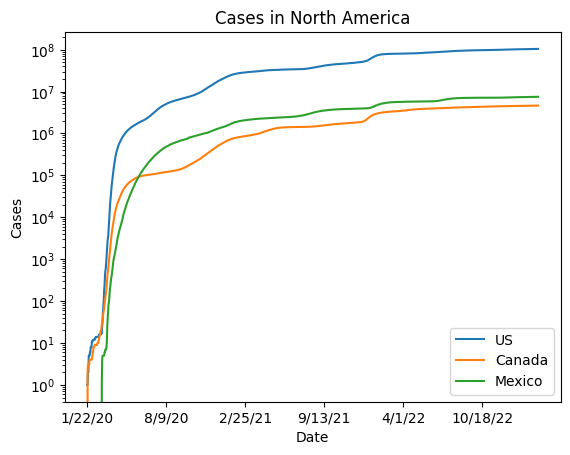

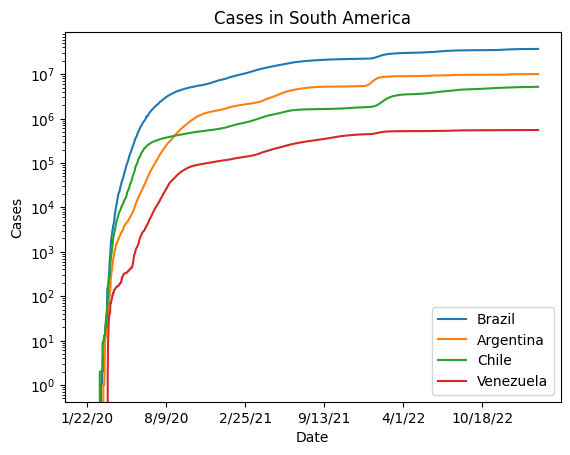

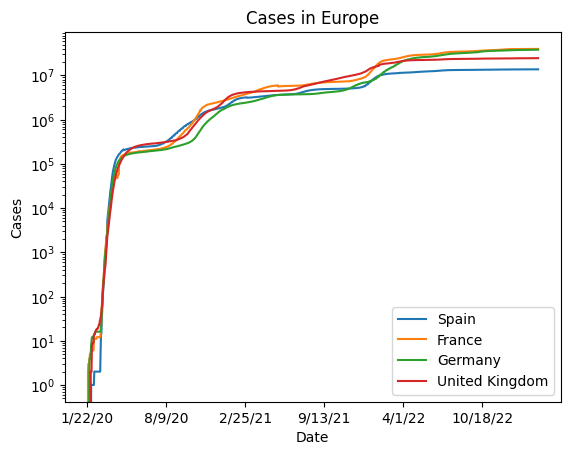

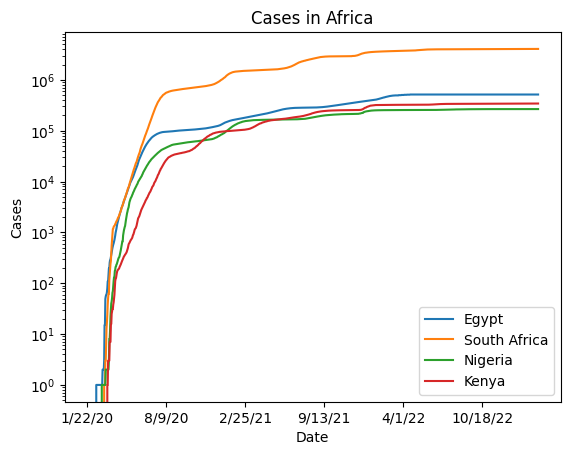

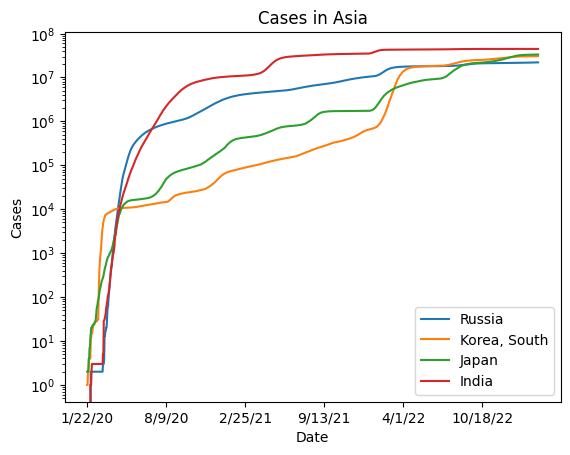

In [33]:
graph_countries(df_cases, north_america, 'Cases in North America')
graph_countries(df_cases, south_america, 'Cases in South America')
graph_countries(df_cases, europe, 'Cases in Europe')
graph_countries(df_cases, africa, 'Cases in Africa')
graph_countries(df_cases, asia, 'Cases in Asia')

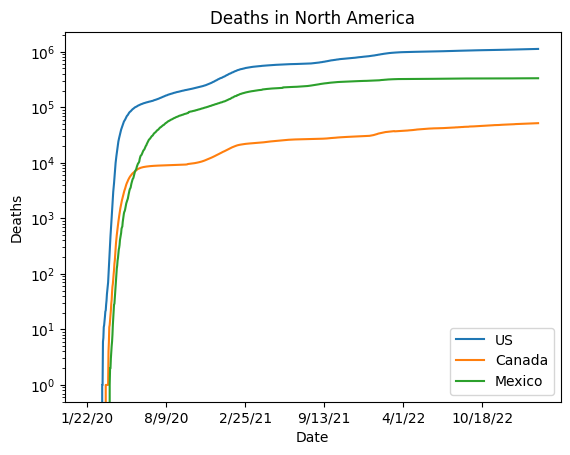

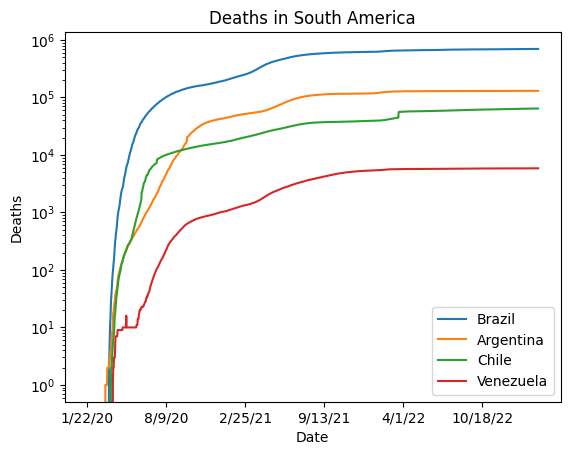

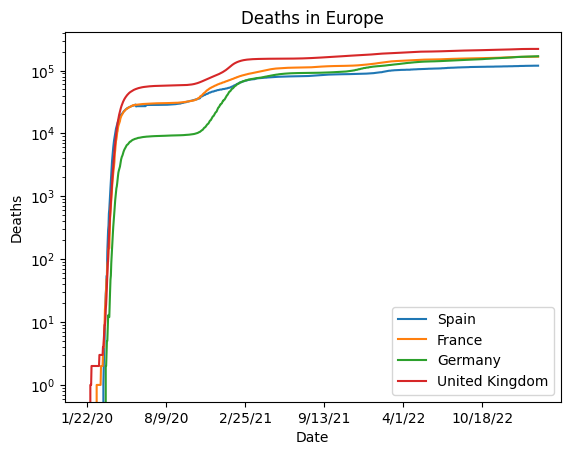

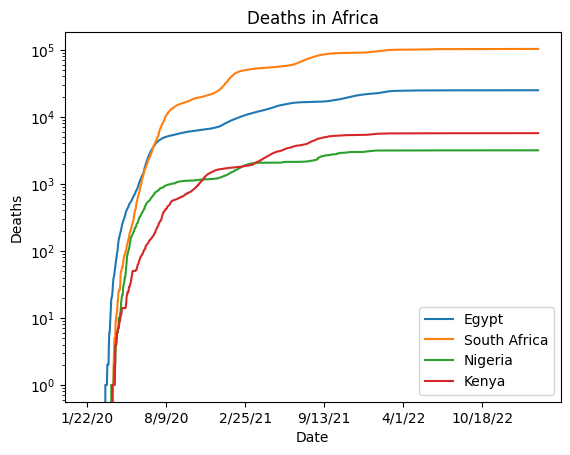

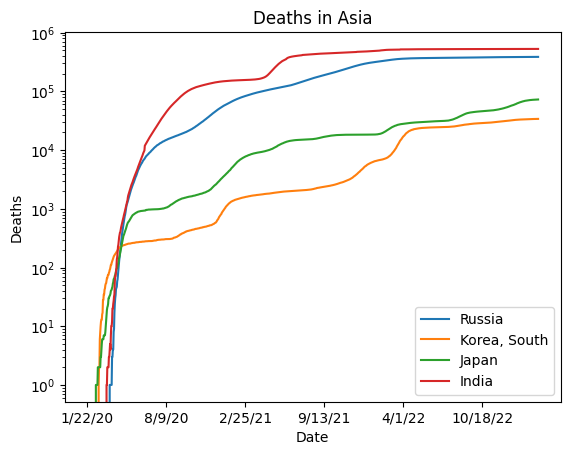

In [34]:
graph_countries(df_deaths, north_america, 'Deaths in North America')
graph_countries(df_deaths, south_america, 'Deaths in South America')
graph_countries(df_deaths, europe, 'Deaths in Europe')
graph_countries(df_deaths, africa, 'Deaths in Africa')
graph_countries(df_deaths, asia, 'Deaths in Asia')

*** 
# Task 3 - Feature Engineering
*** 

### 3.1 `Log10` transform all numeric columns
Define a resuable function that applies a log10 transformation to all data in the given dataframe.



We need to lift the value off the zero floor to avoid `-inf` values.
* add `1` to every value before `log10` transform so that no value in the dataframe is 0

In [18]:
# log10 transform all int64 columns
def log10_transform(df):
  df = df + 1
  df = df.apply(np.log10)
  return df

> This function will be called by the experiment below, you do not need to call it explicitly.

### 3.2 Drop days 

With our current data, we could treat today's death/case count as our **y**, and use all prior days as our **X**. This would produce a model that predicts 1 day into the future. But, we want to be able to predict more than one day in advance.  

Complete the function to drop `num_days` from the end of the data frame while keeping the last column to use as our **y**.  

For example, given the column series:

$$\texttt{4/14, 4/15, 4/16, 4/17, 4/18, 4/19, 4/20}$$

`drop_days(df_cases, 3)` would return a dataframe with columns:

$$\texttt{4/14, 4/15, 4/16, 4/20}$$

having dropped $\texttt{4/17, 4/18, 4/19}$, the last `num_days=3` columns that are not the last column.

We can now use all data leading up to $\texttt{4/16}$ as our **X** and use $\texttt{4/20}$ as our **y**, leaving out the data in between. This would produce a model that predicts 4 days into the future. 

By varying `num_days` we can generate models with different forecast windows.

> `num_days=0` means no columns are dropped.  It is means predict tomorrow.

> In general, to predict `t` days into the future, set `num_days = t + 1`

In [19]:
# drop the num_days, return the df
def drop_days(df, num_days):
  # drop the last num_days columns + 1 and add the last column back on
  return df.iloc[:, :-(num_days+1)].join(df.iloc[:, -1])


In [20]:
# Briefly test your function to ensure it is behaving as expected
print(df_cases.columns)
print(drop_days(df_cases, 3).columns)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1143)
Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '2/25/23', '2/26/23', '2/27/23', '2/28/23', '3/1/23', '3/2/23',
       '3/3/23', '3/4/23', '3/5/23', '3/9/23'],
      dtype='object', length=1140)


> This function will be called by the experiment below, you do not need to call it explicitly.

*** 
# Task 4 - Train a `LinearRegression` model
*** 

### 4.1 Train/Test split and partition

Complete this function that takes in a list of countries and a dataframe and partitions into `X_train, y_train, X_test, y_test`. We will use some countries to train our model, and other countries to test our model.

* `test_lst` represents the countries to put in the test set
* all other countries comprise the train set
* no country should appear in both train and test set
* `df` represents the dataframe to partition

In [21]:
# for the given dataframe split into train and test
def train_test_split(df, test_lst):

  # drop the test_lst from the df
  df_train = df.drop(test_lst)
  # drop df_train from the df to make df_test
  df_test = df.drop(df_train.index)
 
  # splitting on the last column
  X_train = df_train.iloc[:, :-1].values
  y_train = df_train.iloc[:, -1].values
  X_test = df_test.iloc[:, :-1].values
  y_test = df_test.iloc[:, -1].values
  return X_train, y_train, X_test, y_test

> The `test_lst` should contain at least two countries

### 4.2 Train and test a model

Complete the function that trains a regressor and predicts the test set.

Model: [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) linear regressor with regularization
* `alpha=1.0`
* `random_state=1`

In [22]:
# train and predict a Ridge regressor
def predict(X_train, y_train, X_test, y_test):
  # Create a Ridge regressor
  regressor = Ridge(alpha=1.0, random_state=1)
  # Fit the regressor on training data
  regressor.fit(X_train, y_train)
  # Generate predictions for test data
  y_pred = regressor.predict(X_test)
  # Return the regressor and the predicted values
  return regressor, y_pred

In [35]:
df1 = drop_days(df_cases.copy(), 0)

# log transform
df1 = log10_transform(df1)

country_lst = ['US', 'Canada', 'Mexico']

# train and predict
X_train, y_train, X_test, y_test = train_test_split(df1, country_lst)  
regressor, y_pred = predict(X_train, y_train, X_test, y_test)

print(y_test)
print(y_pred)


[6.6643689  6.87410157 8.01620866]
[6.66095613 6.86773327 8.01600007]


*** 
# Task 5 - Explore Results
*** 

There is no code to write in this section.  Run the code blocks.  It is worth reading through this code carefully to understand what is happening.

You should edit the list of countries in the final block to explore different results. 

### 5.1 Train and test pipeline

This provided function runs the entire experiment leveraging all of the previously defined functions.
This function performs the following actions:
1. Drop num_days from data
2. Log transform data
3. Train regression model
4. Test model
5. Analyze results
6. Examine predictions
7. Track and return the number of miscounts for each predicted country

In [24]:
def train_and_test(df, country_lst=['US', 'Mexico'], num_days=0, verbose=True):
  # Empty list to track miscounts
  miscounts = []
  
  if (verbose and len(country_lst) < 2):
    print("Error: At least two countries must be supplied in order to generate metrics")
    print("Set verbose to False or provide a country_lst with at least two elements")
    raise Exception('Invalid Arguments')

  # Drop days
  df1 = drop_days(df.copy(), num_days)

  # log transform
  df1 = log10_transform(df1)

  # train and predict
  X_train, y_train, X_test, y_test = train_test_split(df1, country_lst)  
  regressor, y_pred = predict(X_train, y_train, X_test, y_test)

  # data statistics
  if verbose:
    print('Date\t{0}'.format(df1.columns[-1]))
    print('Window\t{0} days'.format(num_days))
    print('Train\t{0} {1}'.format(X_train.shape, y_train.shape)) 
    print('Test\t{0} {1} {2}'.format(X_test.shape, y_test.shape, y_pred.shape))
    print()

  # analyze results
  if verbose:
    print('R^2\t{:f}'.format(regressor.score(X_test, y_test)))
    print('MAE\t{:f}'.format(mean_absolute_error(y_test, y_pred)))
    print('MSE\t{:f}'.format(mean_squared_error(y_test, y_pred)))  
    print('r\t{:f}'.format(pearsonr(y_test, y_pred)[0]))
    print()

  # prediction error for each country
  for country in country_lst:
    idx = country_lst.index(country)
    miscount = int(round((10**y_test[idx]-1) - (10**y_pred[idx]-1)))
    miscounts.append(miscount)
    if verbose: print('{:<15} {:s} by {:d} people'.format(country, ' over' if miscount < 0 else 'under', abs(miscount))) 

  # graph true vs predicted
  if verbose: 
    print()  
    x = y_test
    y = y_pred
    plt.figure()
    plt.scatter(x, y, color='blue',s=100)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title('Results')
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red', linewidth=2)  
    plt.show()

  # return miscount  
  return miscounts

> You should not change anything in the above function

### 5.2 Run the experiment

In [25]:
# run experiment for both cases and deaths
def experiment(country_lst, num_days):
  # cases
  print(('='*14) + '\n    CASES\n' + ('='*14))
  train_and_test(df_cases, country_lst, num_days)

  # deaths
  print(('='*14) + '\n    DEATHS\n' + ('='*14))
  train_and_test(df_deaths, country_lst, num_days)  

Experiment with different country lists and predictive lookahead windows by modifying `country_lst` and `num_days` respectively

    CASES
Date	3/9/23
Window	3 days
Train	(198, 1139) (198,)
Test	(3, 1139) (3,) (3,)

R^2	0.999947
MAE	0.003440
MSE	0.000019
r	0.999997

US              under by 37310 people
Canada          under by 112596 people
Mexico          under by 50423 people



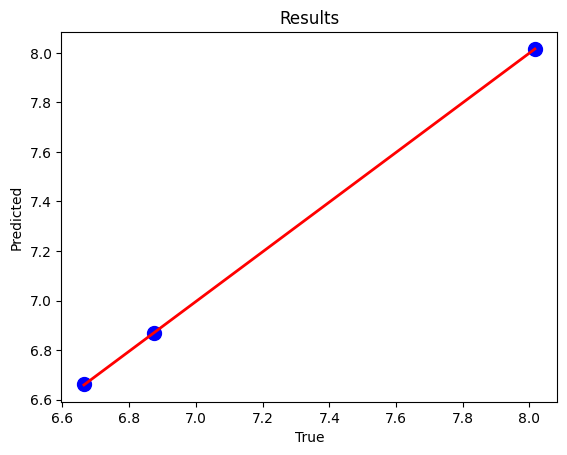

    DEATHS
Date	3/9/23
Window	3 days
Train	(198, 1139) (198,)
Test	(3, 1139) (3,) (3,)

R^2	0.999888
MAE	0.003641
MSE	0.000034
r	0.999993

US              under by 1186 people
Canada          under by 84 people
Mexico          under by 1918 people



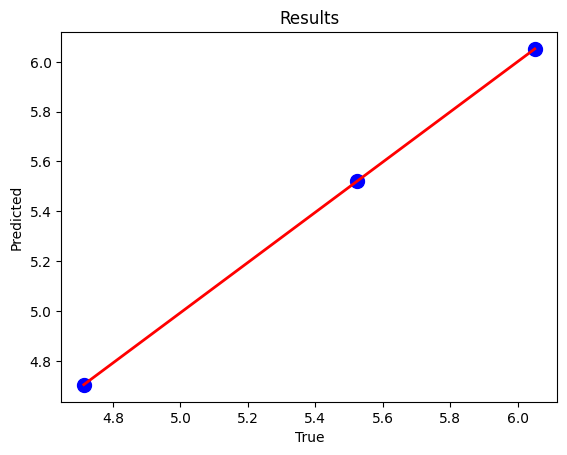

In [26]:
# countries to test
country_lst = north_america            # <== CHANGE ME!!

# number of days to drop
num_days = 3                    # <== CHANGE ME!!

# run experiment
experiment(country_lst, num_days)

*** 
# Task 6 - Assessing predictive look ahead
*** 

In this section, you will choose a short list of countries and graph the number of mispredictions for both `cases` and `deaths` as a function of the predictive window.

In other words, you will vary the `num_days` dropped from the data to see how the size of the lookahead affects model accuracy.

### 6.1 Function to graph predictive lookahead over time

1. Select a list of countries (your choice)
2. For each day `d` in `[0..13]` of predictive window (2 weeks)
  * `train_and_test` with each country `c` with `d` days removed
  * save the miscounts
3. Graph the miscounts (x_axis=days vs y_axis=person count)
  * reverse the `x_axis`
    * `0` days is the last (right-most) date
    * `13` is the first (left-most) date
  * place countries on the same graph
  * place `cases` and `deaths` on separate graphs
4. Beautify your graphs
  * label graph title and axes
  * include a legend
  * customize colors as you like


> Put your work in the function below so we can call it (again) in the `Report` section. You can (and probably should) add helper functions as needed.

In [27]:
def predict_ahead(country_lst, df_cases, df_deaths):
    
    # Make an array of 0-13 days to drop
    num_days = np.arange(14)

    # Make an array of absolute value miscounts for each day dropped for both cases and deaths
    # Uses map() with lambda function to apply train_and_test to each day dropped - so pythonic!
    miscounts_c = np.absolute(list(map(lambda x: train_and_test(df_cases, country_lst, x, False), num_days)))
    miscounts_d = np.absolute(list(map(lambda x: train_and_test(df_deaths, country_lst, x, False), num_days)))

    def plot_miscounts(country_lst, miscounts_c, miscounts_d):

        # Create a figure with two subplots and set the figure size
        fig, (cases, deaths) = plt.subplots(1, 2, figsize=(20, 5))

        # Plot the miscounts for each country using map() and lambda function - no for loops to be seen!
        # Calling np.array() on the map() object converts it to an array so we can plot it.
        # Apply to both cases and deaths
        np.array(list(map(lambda x: deaths.plot(miscounts_d[:, x], label=country_lst[x]), range(len(country_lst)))))
        deaths.invert_xaxis()
        deaths.set_xlabel('Days Dropped')
        deaths.set_ylabel('Miscounts')
        deaths.set_title('Deaths')
        deaths.legend()

        np.array(list(map(lambda x: cases.plot(miscounts_c[:, x], label=country_lst[x]), range(len(country_lst)))))
        cases.invert_xaxis()
        cases.set_xlabel('Days Dropped')
        cases.set_ylabel('Miscounts')
        cases.set_title('Cases')
        cases.legend()

        plt.show()

    plot_miscounts(country_lst, miscounts_c, miscounts_d)
    

### 6.2 Test your predictive lookahead

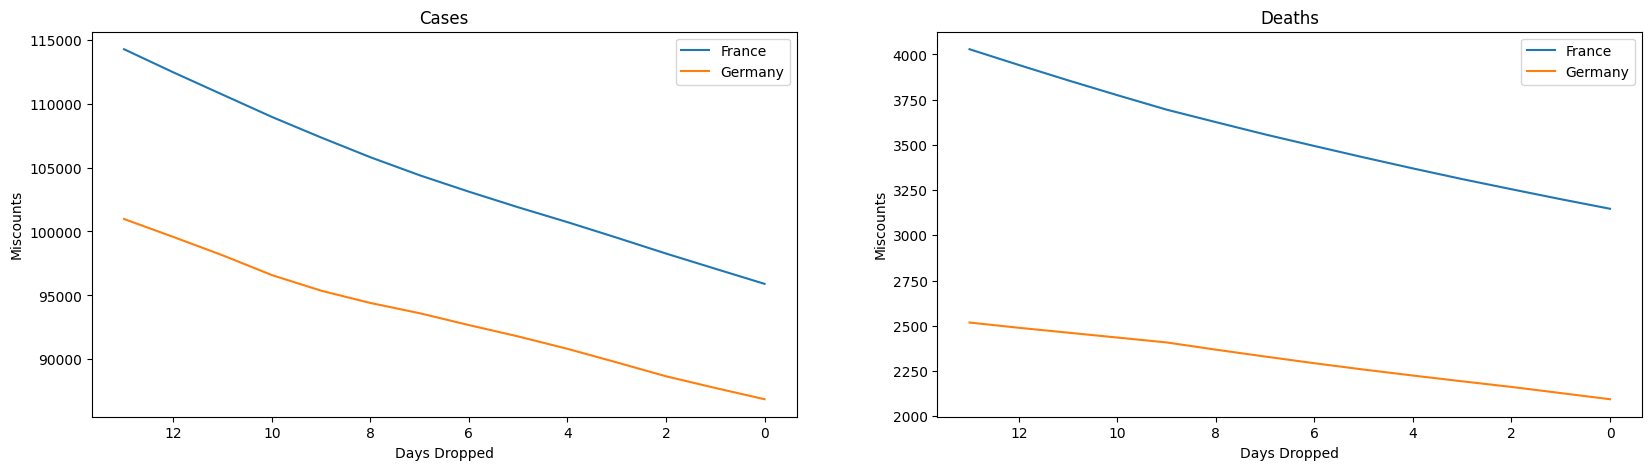

In [28]:
# update to select any 2+ countries of choice
country_lst = ['France','Germany']

# graph your predictive lookahead
predict_ahead(country_lst, df_cases, df_deaths)

# Report

In [29]:
# for grading (values will change)
grading_country_list = ['Austria', 'Australia']
grading_num_days = 0

***
#### Question 1 
Consider your evaluation of the model (e.g., $R^2$, correlation). How did the model do? What conclusions can you draw?
***

##### Response 1

Given our R^2 and our correlation I would say that the model fit our observations fairly well. The high R^2 and r values, combined with the low MAE and MSA values indicate high correlation and accuracy with low error rates. This means our predictions are fairly close to the actual values consistently across each test country.

***
#### Question 2
Consider the miscounts for `cases` and `deaths`.  How did did the model do?  What conclusions can you draw?
***

##### Response 2

For the countries I chose, my model consistently under predicted both cases and deaths for every country in the list. In cases, the mispredictions were off by up to 112k but when we consider the large numbers we are working with (like 100,000,000 cases), this prediction is not that far off percentage-wise. For deaths we were under predicting by much less but deaths were also significantly lower than cases. Overall I believe the model did fairly well.

***
#### Question 3
Consider your experiment in Task 6.  How'd the model do as it looked further and further into the future? Explain and discuss. 
***

##### Response 3

As the model predicted further and further into the future, the miscounts grew larger, whether that be under or over predicting. As we came closer to predicting the next day, the miscounts became smaller and we came close to predictiing the correct results. This makes sense as when we are predicting out further and further, we have realtively less and less data to base those predictions on.

***
#### Question 4
Below, run your function from `Task 6` to produce your graph evaluating the days of predictive look ahead (no text response needed).
***

##### Response 4

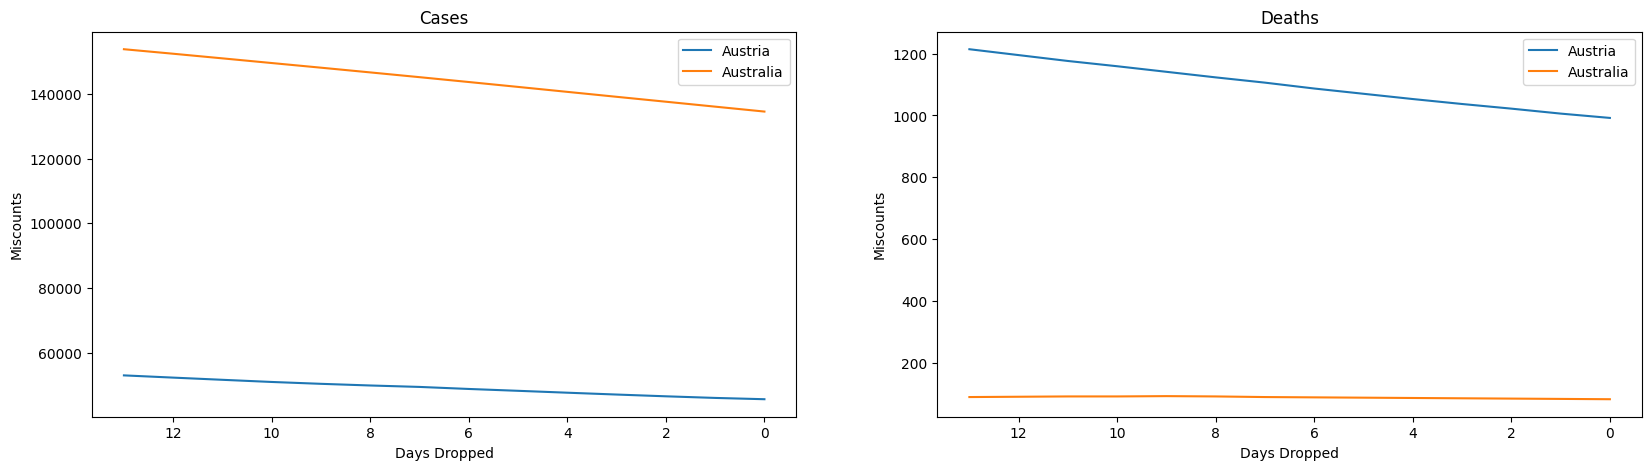

In [36]:
# show me your predictive lookahead
predict_ahead(grading_country_list, df_cases, df_deaths)

***
#### Question 5
Consider our feature space (counts by date) and the nature of the data/problem itself.  Is this a good way to model the problem?  Why or why not?  What might you change? How might your restructure the data?
***

##### Response 5

I think that overall our model did fairly well at predicting case counts and deaths, but I don't think it the ideal feature space to really optimize predictions. the feature space we use is VERY one dimensional and doesn't take into consideration other factors for the spread of disease such as the population size or population density of a country. It also doesn't take into account any sort of social distancing or isolation practices a country practices (not that those worked at all). Beyond that it doesn't take into account vaccination rates. I think if I were to restructure the data I would add in country population and density as those could be rather predictive features. I would also maybe use the number of new cases or new deaths per day instead of a running total on each day. This could give us a better running total prediction since we aren't working with such large numbers and predicting a few more/less deaths or cases perhaps wouldn't effect the running total as much. If we then wanted to get the total cases or deaths, we could easily do that by summing our cases or deaths per day and adding them to our predicted cases or deaths.

***
#### Grading Test
***

This following will be used for evaluating your `Lab 2`. You do not need to alter.

    CASES
Date	3/9/23
Window	0 days
Train	(199, 1142) (199,)
Test	(2, 1142) (2,) (2,)

R^2	0.997441
MAE	0.005829
MSE	0.000051
r	1.000000

Austria         under by 45557 people
Australia       under by 134617 people



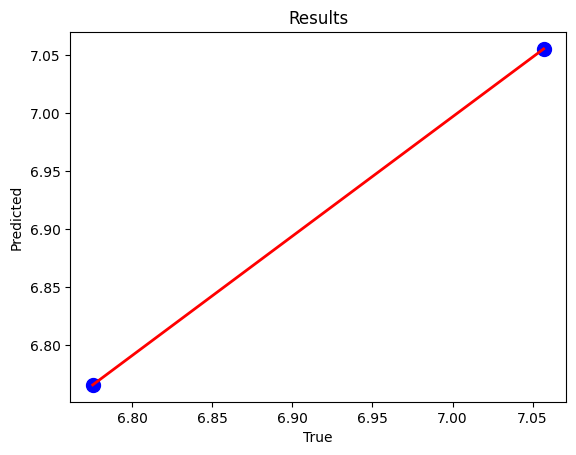

    DEATHS
Date	3/9/23
Window	0 days
Train	(199, 1142) (199,)
Test	(2, 1142) (2,) (2,)

R^2	0.592219
MAE	0.012115
MSE	0.000256
r	1.000000

Austria         under by 992 people
Australia       under by 83 people



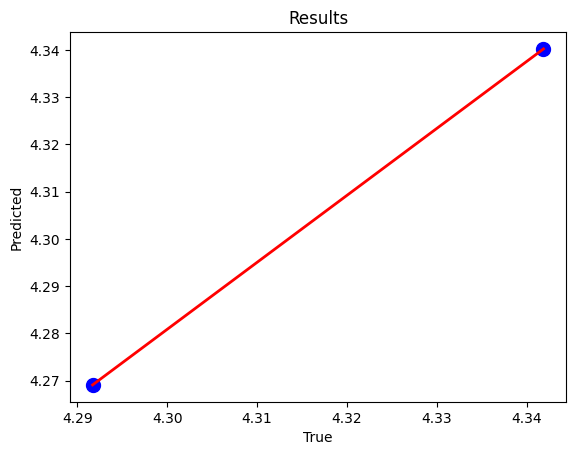

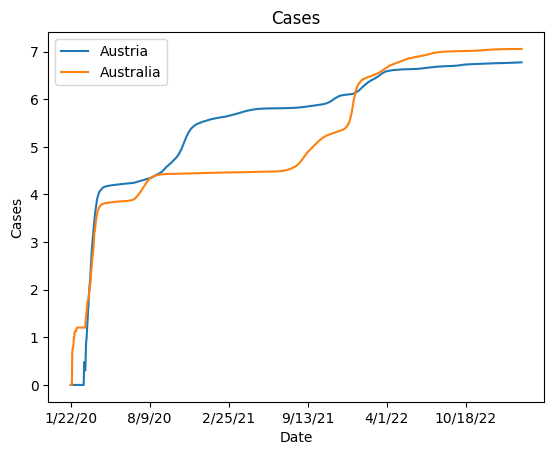

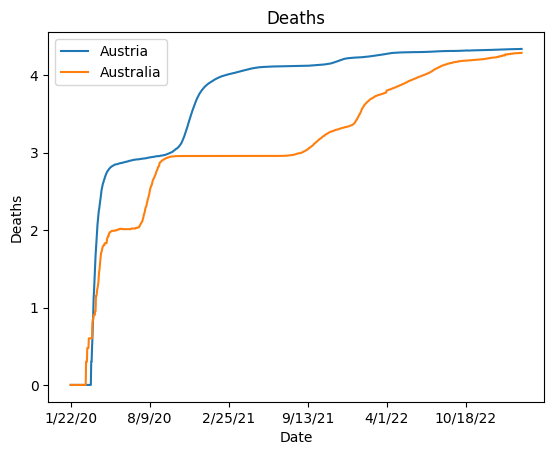

In [31]:
# To grade, I will run this code snippet
#    with different countries and a different num_days
# Your code is expected to work for the most recent date
experiment(grading_country_list, grading_num_days)
print()
graph_countries(log10_transform(df_cases),  grading_country_list, 'Cases')
graph_countries(log10_transform(df_deaths), grading_country_list, 'Deaths')